<div class="usecase-title"><h2><b>Enhancing Urban Greening through Laneway Potential Analysis</b></h2></div>

<div class="usecase-authors"><b>Authored by: </b> Randi Tamasha Gunasekara Henadeerage Dona</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas, Matplotlib, Folium, Geopy,Scikit-learn, Random Forest</div>
</div>

<div class="usecase-section-header"><h3><b>Use case scenario</b></h3></div>

**As a:** A person living in Melbourne who wants greener and cooler spaces in the city for better environmental quality and community enjoyment.<br>

**I want to:** See Melbournes laneways identified and prioritized for greening initiatives, such as planting trees, creating vertical gardens, and developing small green parks.<br>

**So that I can:** Enjoy cooler, more beautiful public spaces that reduce the effects of urban heat, improve air quality, support local biodiversity, and make the city a more inviting place for everyone.

**By:**
- Highlighting laneways with the highest potential for greening based on their current conditions and environmental impact.
- Utilizing available public datasets to focus efforts where they can create the greatest benefit, such as areas with:High urban heat island intensity,Low tree canopy coverage or vegetation.
- Identifying opportunities to align greening projects with sustainable water management practices by considering natural water flow routes.
- Designing accessible green spaces to ensure they are usable by the entire community, including families, children, and the elderly.
- Using geospatial analysis and interactive visualizations to demonstrate the impact and feasibility of greening projects.


<div class="usecase-section-header"><h3><b>What this use case will teach you</b></h3></div>

- This use case demonstrates how to effectively combine diverse datasets to identify areas that are most suitable for urban greening. By working with real-world data, you will learn how to address environmental challenges in an urban setting.

- You will gain hands-on experience in utilizing geospatial data and microclimate information to support decisions in urban planning and sustainability initiatives.

- The case study highlights techniques to analyze connections between tree canopy coverage, water flow, and heat island effects. This knowledge is crucial for designing strategies that maximize environmental benefits and improve urban livability.

- Developing user-friendly dashboards and interactive visualizations is an essential skill you will master, allowing you to communicate insights to a broad audience, including city planners, policymakers, and the community.

- You will learn how to assess the potential environmental and societal impacts of urban greening projects, enabling you to provide data-driven recommendations for sustainable development.


<div class="usecase-section-header"><h3><b>Project Goals and expected outcomes</b></h3></div>

- This project aims to showcase the ability to work with multiple open datasets to perform detailed analyses for urban greening. You will demonstrate expertise in identifying areas where urban greenery can have the greatest impact.

- The analyses will include spatial and environmental assessments to prioritize laneways for initiatives like tree planting, park development, and vertical gardens. These efforts will focus on maximizing accessibility and environmental benefits.

- The project intends to provide actionable insights to mitigate urban heat island effects by increasing tree coverage and optimizing green spaces. It emphasizes creating sustainable and climate-resilient urban areas.

- A key deliverable is the development of an intuitive dashboard that visualizes the insights from the analysis. This tool will assist stakeholders, including urban planners and environmentalists, in making informed decisions.

- Ultimately, the project will present practical recommendations for urban greening in Melbourne, contributing to the city's sustainability and improving the quality of life for its residents.

### Initialization

#### Importing all the required libraries.

In [49]:
import requests
import pandas as pd
from io import StringIO
from geopy.distance import geodesic
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#### Importing the data through API from open data portal of Melbourne
The function efficiently retrieves data from open datasets using API endpoints, allowing users to fetch data in CSV format for detailed analysis. By specifying the dataset ID and API key, the function sends a request to the Melbourne data portal and processes the response to extract relevant data. This approach simplifies the integration of various datasets such as laneways, tree canopies, microclimate sensor data, and water flow routes into analytical workflows, ensuring easy access and seamless data processing for urban planning and environmental studies.

In [50]:
#Function that collects data from the datasets
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    apikey = '784b023fefc085be05a7a6c706a6cc1595bef507c502caa1db414307'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey  
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

#### Displaying number of records in each dataset.
Followig part demonstrates how data from multiple datasets is retrieved and stored for analysis. The function collect_data is used to fetch data from four specific datasets: laneways with greening potential, tree canopies, microclimate sensors, and water flow routes. The retrieved datasets are stored in separate variables—laneways, tree_canopies, microclimate_sensors, and water_flow_routes. The total number of records in each dataset is then displayed, providing a clear understanding of the dataset sizes and the volume of information available for analysis. This process ensures that the necessary datasets are organized and ready for further exploration and integration into the project's analytical tasks.

In [51]:
#Giving datasets id's so that they can be queried for the API call
dataset_id1 = 'laneways-with-greening-potential'
dataset_id2 = 'tree-canopies-2021-urban-forest'
dataset_id3 = 'microclimate-sensors-data'
dataset_id4 = 'water-flow-routes-over-land-urban-forest'

#Use different variables to save the dataset
laneways = collect_data(dataset_id1)
tree_canopies = collect_data(dataset_id2)
microclimate_sensors = collect_data(dataset_id3)
water_flow_routes = collect_data(dataset_id4)

#Displaying the number of records in the dataset.
print(f'The laneways dataset contains {len(laneways)} records.')
print(f'The tree_canopies dataset contains {len(tree_canopies)} records.')
print(f'The microclimate_sensors dataset contains {len(microclimate_sensors)} records.')
print(f'The water_flow_routes dataset contains {len(water_flow_routes)} records.')

The laneways dataset contains 246 records.
The tree_canopies dataset contains 57980 records.
The microclimate_sensors dataset contains 179046 records.
The water_flow_routes dataset contains 7701 records.


####  First few rows of the Laneway dataset

In [52]:
#View the first few rows of each dataset
print("Laneways:")
laneways.head(5)

Laneways:


,geo_point_2d,geo_shape,segid_1,mapbase_mc,insol_scor,verticalsu,segid,driveways,parklane,objectid,...,farmlane,walls,farm_rank,vert_rank,fores_rank,forest,park_rank,binsperct,mapbase_1,wsud
0,"-37.81535672343349, 144.95569265063773","{""coordinates"": [[[[144.9556606568115, -37.815...",20061,0.0,4.056745,66.713100,20061,0,63.516600,0,...,0.0,Consider,Lowest potential,Highest potential,Lowest potential,0.000000,Highest potential,0.0,Bourke Place,Probably Unsuitable
1,"-37.81037958674067, 144.97089952599487","{""coordinates"": [[[[144.9708657242154, -37.810...",20226,20226.0,3.110616,48.868240,20226,5 or more,0.000000,2,...,0.0,Consider,Lowest potential,Good potential,Good potential,38.521944,Lowest potential,40.0,Punch Lane,Consider
2,"-37.810217121848865, 144.97162762401734","{""coordinates"": [[[[144.9717580200683, -37.810...",20227,20227.0,2.269407,57.564357,20227,2,48.897065,3,...,0.0,Consider,Lowest potential,Highest potential,Lowest potential,0.000000,Good potential,40.0,Little Bourke Place,Consider
3,"-37.81077581774339, 144.97188375120993","{""coordinates"": [[[[144.97184322645086, -37.81...",20228,20228.0,1.731598,63.224829,20228,1,0.000000,4,...,0.0,Consider,Lowest potential,Highest potential,Highest potential,55.532329,Lowest potential,40.0,Cl1639,Consider
4,"-37.811226042417026, 144.97139352262127","{""coordinates"": [[[[144.9716104991305, -37.811...",20231,20231.0,2.754746,67.186286,20231,1,65.118885,7,...,0.0,Consider,Lowest potential,Highest potential,Lowest potential,0.000000,Highest potential,40.0,Liverpool Street,Consider


####  First few rows of the Tree canopy dataset

In [53]:
print("Tree canopies:")
tree_canopies.head(5)

Tree canopies:


,geo_point_2d,geo_shape
0,"-37.77506304683423, 144.93898465421296","{""coordinates"": [[[[144.9389624164712, -37.775..."
1,"-37.775132956993566, 144.93979253397976","{""coordinates"": [[[[144.93978541786475, -37.77..."
2,"-37.77515941768105, 144.93986878938023","{""coordinates"": [[[[144.93986368038625, -37.77..."
3,"-37.775130649990984, 144.9389679196713","{""coordinates"": [[[[144.93894119058956, -37.77..."
4,"-37.77518700935825, 144.93875479828375","{""coordinates"": [[[[144.93877858274755, -37.77..."


####  First few rows of the Microclimate dataset

In [54]:
# View the first few rows of each dataset
print("Microclimate sensors:")
microclimate_sensors.head(5)

Microclimate sensors:


,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-10,2024-11-03T02:17:17+00:00,1 Treasury Place,"-37.8128595, 144.9745395",87.0,186.0,251.0,0.5,2.9,6.0,19.0,48.9,1003.9,1.0,10.0,109.4
1,ICTMicroclimate-08,2024-11-03T01:56:45+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,194.0,350.0,0.0,2.4,7.7,19.2,46.6,1008.3,1.0,1.0,91.9
2,ICTMicroclimate-06,2024-11-03T02:06:04+00:00,Tram Stop 7B - Melbourne Tennis Centre Precinc...,"-37.8194993, 144.9787211",0.0,148.0,355.0,0.0,2.3,7.7,20.9,42.1,1008.5,0.0,0.0,78.4
3,ICTMicroclimate-02,2024-11-03T01:59:01+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",297.0,359.0,353.0,0.6,0.7,2.3,21.3,41.3,1003.4,2.0,6.0,68.6
4,ICTMicroclimate-11,2024-11-03T01:55:37+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,130.0,356.0,0.0,1.6,6.5,20.3,44.8,1003.5,0.0,0.0,57.2


####  First few rows of the Water flow dataset

In [55]:
# View the first few rows of each dataset
print("Water flow routes:")
water_flow_routes.head(5)

Water flow routes:


,geo_point_2d,geo_shape,grid_code,source,to_node,arcid,from_node
0,"-37.80911176494055, 144.93012309946076","{""coordinates"": [[[144.93011742293473, -37.809...",3,2008 DEM to stream order using ESRI Spatial An...,3112,3502,3111
1,"-37.809058664071806, 144.9260809159682","{""coordinates"": [[[144.92607523946074, -37.809...",1,2008 DEM to stream order using ESRI Spatial An...,3117,3510,3116
2,"-37.809125375669765, 144.9301283986763","{""coordinates"": [[[144.9301285244465, -37.8091...",1,2008 DEM to stream order using ESRI Spatial An...,3119,3513,3114
3,"-37.80910533581021, 144.9330618231697","{""coordinates"": [[[144.9325431629517, -37.8088...",1,2008 DEM to stream order using ESRI Spatial An...,3109,3514,3086
4,"-37.8090628677719, 144.9260637604292","{""coordinates"": [[[144.92606388644597, -37.809...",1,2008 DEM to stream order using ESRI Spatial An...,3120,3515,3115


### Data Cleaning and Preprocessing

The Data Cleaning and Preprocessing step involves preparing the datasets for analysis by handling inconsistencies, missing values, and formatting issues. This includes splitting combined location columns (such as latitude and longitude), removing unnecessary columns, and aligning the data across multiple datasets to ensure compatibility for merging. By standardizing the data and addressing any quality issues, this step ensures that the datasets are accurate, complete, and structured effectively for analysis. This process is crucial for maintaining the reliability and validity of the insights derived from the datasets.

#### Displaying the columns in each dataset

This step involves listing all the columns in each dataset to understand their structure and available data fields. By printing the column names, we can identify the relevant attributes for analysis and ensure that the datasets contain the necessary information for our study. This also helps in verifying the alignment of the datasets, determining which columns can be used for merging or analysis, and planning further preprocessing or cleaning tasks. Understanding the structure of each dataset is a critical foundation for effective data analysis.

In [56]:
print("Columns in laneways dataset:")
print(laneways.columns.tolist())

print("\nColumns in tree canopies dataset:")
print(tree_canopies.columns.tolist())

print("\nColumns in microclimate sensors dataset:")
print(microclimate_sensors.columns.tolist())

print("\nColumns in water flow routes dataset:")
print(water_flow_routes.columns.tolist())


Columns in laneways dataset:
['geo_point_2d', 'geo_shape', 'segid_1', 'mapbase_mc', 'insol_scor', 'verticalsu', 'segid', 'driveways', 'parklane', 'objectid', 'climate_ty', 'narrowing', 'closepart', 'farmlane', 'walls', 'farm_rank', 'vert_rank', 'fores_rank', 'forest', 'park_rank', 'binsperct', 'mapbase_1', 'wsud']

Columns in tree canopies dataset:
['geo_point_2d', 'geo_shape']

Columns in microclimate sensors dataset:
['device_id', 'received_at', 'sensorlocation', 'latlong', 'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection', 'minimumwindspeed', 'averagewindspeed', 'gustwindspeed', 'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25', 'pm10', 'noise']

Columns in water flow routes dataset:
['geo_point_2d', 'geo_shape', 'grid_code', 'source', 'to_node', 'arcid', 'from_node']


#### Select relevant columns for each dataset

In [57]:
laneways = laneways[['geo_point_2d', 'insol_scor', 'verticalsu', 'farm_rank', 'vert_rank', 'fores_rank', 'park_rank']]
tree_canopies = tree_canopies[['geo_point_2d', 'geo_shape']]
microclimate_sensors = microclimate_sensors[['latlong', 'airtemperature', 'pm25', 'relativehumidity']]
water_flow_routes = water_flow_routes[['geo_point_2d', 'grid_code', 'source', 'to_node']]

### Cleaning the Laneways dataset

For the laneways dataset, a series of data preprocessing steps was conducted to ensure the quality and usability of the data. First, missing values were checked, and it was confirmed that all columns were complete without any missing data, which is essential for accurate analysis. Next, the dataset was examined for duplicate rows, and none were found, ensuring there was no redundant information. The data types of each column were reviewed to ensure alignment with the intended analysis. For instance, numeric values like insol_scor were appropriately stored as float64, and categorical ranks like farm_rank and park_rank were stored as object. Lastly, the geo_point_2d column was split into separate latitude and longitude columns and converted into numeric formats, facilitating spatial analysis and visualization. These steps ensured the dataset was clean, consistent, and ready for further analysis.

In [58]:
# Check for missing values
print("Missing values in laneways dataset:")
print(laneways.isnull().sum())

Missing values in laneways dataset:
geo_point_2d    0
insol_scor      0
verticalsu      0
farm_rank       0
vert_rank       0
fores_rank      0
park_rank       0
dtype: int64


In [59]:
# Check for duplicates and remove them
print("Number of duplicate rows in laneways dataset:", laneways.duplicated().sum())
laneways = laneways.drop_duplicates()

Number of duplicate rows in laneways dataset: 0


In [60]:
# Check the data types of the columns
print("Data types in the Laneways dataset:")
print(laneways.dtypes)

Data types in the Laneways dataset:
geo_point_2d     object
insol_scor      float64
verticalsu      float64
farm_rank        object
vert_rank        object
fores_rank       object
park_rank        object
dtype: object


In [61]:
# Split 'geo_point_2d' into latitude and longitude
laneways[['latitude', 'longitude']] = laneways['geo_point_2d'].str.split(',', expand=True)
laneways['latitude'] = laneways['latitude'].astype(float)  # Convert latitude to float
laneways['longitude'] = laneways['longitude'].astype(float)  # Convert longitude to float

# Drop the original 'geo_point_2d' column
laneways = laneways.drop(columns=['geo_point_2d'])

# Verify the updated Laneways dataset
print("Laneways dataset after splitting 'geo_point_2d':")
print(laneways.head())


Laneways dataset after splitting 'geo_point_2d':
   insol_scor  verticalsu         farm_rank          vert_rank  \
0    4.056745   66.713100  Lowest potential  Highest potential   
1    3.110616   48.868240  Lowest potential     Good potential   
2    2.269407   57.564357  Lowest potential  Highest potential   
3    1.731598   63.224829  Lowest potential  Highest potential   
4    2.754746   67.186286  Lowest potential  Highest potential   

          fores_rank          park_rank   latitude   longitude  
0   Lowest potential  Highest potential -37.815357  144.955693  
1     Good potential   Lowest potential -37.810380  144.970900  
2   Lowest potential     Good potential -37.810217  144.971628  
3  Highest potential   Lowest potential -37.810776  144.971884  
4   Lowest potential  Highest potential -37.811226  144.971394  


In [62]:
#Encoding the categorical columns
categorical_columns = ['farm_rank', 'vert_rank', 'fores_rank', 'park_rank']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    laneways[col] = label_encoder.fit_transform(laneways[col])

### Tree canopies dataset

For the tree canopies dataset, the data underwent a thorough cleaning and preprocessing phase to ensure its quality and usability for analysis. First, I verified that there were no missing values in the dataset, confirming that the geo_point_2d and geo_shape columns were complete. Next, the dataset was checked for duplicate rows, and none were found, ensuring the uniqueness of the entries. The data types of each column were reviewed, and it was observed that geo_point_2d and geo_shape were stored as objects.

To facilitate spatial analysis, the geo_point_2d column was split into separate latitude and longitude columns. These new columns were then converted into numeric formats to allow for further computations and visualizations. Finally, the original geo_point_2d column was removed to avoid redundancy, leaving a clean and structured dataset ready for spatial analysis and modeling.

In [63]:
# Check for missing values
print("Missing values in laneways dataset:")
print(tree_canopies.isnull().sum())

Missing values in laneways dataset:
geo_point_2d    0
geo_shape       0
dtype: int64


In [64]:
# Check for duplicates and remove them
print("Number of duplicate rows in laneways dataset:", tree_canopies.duplicated().sum())
tree_canopies = tree_canopies.drop_duplicates()

Number of duplicate rows in laneways dataset: 0


In [65]:
# Check the data types of the columns
print("Data types in the Laneways dataset:")
print(tree_canopies.dtypes)

Data types in the Laneways dataset:
geo_point_2d    object
geo_shape       object
dtype: object


In [66]:
# Split 'geo_point_2d' into latitude and longitude
tree_canopies[['latitude', 'longitude']] = tree_canopies['geo_point_2d'].str.split(',', expand=True)
tree_canopies['latitude'] = tree_canopies['latitude'].astype(float)  # Convert latitude to float
tree_canopies['longitude'] = tree_canopies['longitude'].astype(float)  # Convert longitude to float

# Drop the original 'geo_point_2d' column
tree_canopies = tree_canopies.drop(columns=['geo_point_2d'])

### Microclimate sensors dataset

For the microclimate sensors dataset, a detailed cleaning and preprocessing workflow was implemented to ensure the dataset's readiness for analysis. Initially, I checked for missing values across key columns such as latlong, airtemperature, pm25, and relativehumidity. A significant number of missing entries were found in the latlong and pm25 columns, along with some in airtemperature and relativehumidity. These missing entries were dropped to retain only complete and accurate data.

Next, I identified duplicate rows in the dataset and removed them to maintain data integrity. A total of 6,478 duplicate rows were identified and eliminated. Following this, the data types of all columns were checked to ensure compatibility with analysis requirements.

To facilitate spatial analysis, the latlong column was split into two new columns, latitude and longitude, and these were converted to float types for numerical processing. Finally, the original latlong column was dropped as it was no longer needed. This process resulted in a clean, well-structured dataset suitable for analysis and visualization.

In [67]:
# Check for missing values
print("Missing values in microclimate sensors dataset:")
print(microclimate_sensors.isnull().sum())

Missing values in microclimate sensors dataset:
latlong             11483
airtemperature        379
pm25                10460
relativehumidity      379
dtype: int64


In [68]:
# Drop rows with missing values (if any)
microclimate_sensors = microclimate_sensors.dropna()

In [69]:
# Check for duplicates and remove them
print("Number of duplicate rows in laneways dataset:", microclimate_sensors.duplicated().sum())
microclimate_sensors = microclimate_sensors.drop_duplicates()

Number of duplicate rows in laneways dataset: 6535


In [70]:
# Check the data types of the columns
print("Data types in the Laneways dataset:")
print(microclimate_sensors.dtypes)

Data types in the Laneways dataset:
latlong              object
airtemperature      float64
pm25                float64
relativehumidity    float64
dtype: object


In [71]:
# Split 'latlong' into latitude and longitude
microclimate_sensors[['latitude', 'longitude']] = microclimate_sensors['latlong'].str.split(',', expand=True)
microclimate_sensors['latitude'] = microclimate_sensors['latitude'].astype(float)  # Convert latitude to float
microclimate_sensors['longitude'] = microclimate_sensors['longitude'].astype(float)  # Convert longitude to float

# Drop the original 'latlong' column
microclimate_sensors = microclimate_sensors.drop(columns=['latlong'])

### Water flow routes dataset

For the water flow routes dataset, a systematic cleaning and preprocessing process was undertaken to ensure the data's accuracy and usability. Initially, I verified the dataset for missing values across all columns, including geo_point_2d, grid_code, source, and to_node. No missing values were detected, ensuring the dataset's completeness.

Next, I checked for duplicate rows and found none, which confirmed that the dataset did not have redundant entries. The spatial column geo_point_2d was then split into separate latitude and longitude columns to facilitate spatial analysis. Both these columns were converted to the float data type to ensure compatibility with numerical and mapping tools. The original geo_point_2d column was dropped as it was no longer required.

Additionally, the data types of all columns were reviewed to ensure they matched the intended use. A further check was performed on the grid_code column to understand its statistical distribution and identify any invalid values. Overall, this preprocessing step resulted in a well-structured and clean dataset ready for subsequent analysis and visualization.

In [72]:
# Check for missing values
print("Missing values in water flow routes dataset:")
print(water_flow_routes.isnull().sum())

Missing values in water flow routes dataset:
geo_point_2d    0
grid_code       0
source          0
to_node         0
dtype: int64


In [73]:
# Check for duplicates and remove them
print("Number of duplicate rows in water_flow_routes dataset:", water_flow_routes.duplicated().sum())
water_flow_routes = water_flow_routes.drop_duplicates()

Number of duplicate rows in water_flow_routes dataset: 0


In [74]:
# Split 'geo_point_2d' into latitude and longitude
water_flow_routes[['latitude', 'longitude']] = water_flow_routes['geo_point_2d'].str.split(',', expand=True)
water_flow_routes['latitude'] = water_flow_routes['latitude'].astype(float)  # Convert latitude to float
water_flow_routes['longitude'] = water_flow_routes['longitude'].astype(float)  # Convert longitude to float

# Drop the original 'geo_point_2d' column
water_flow_routes = water_flow_routes.drop(columns=['geo_point_2d'])

In [75]:
# Check the data types of the columns
print("Data types in the water flow dataset dataset:")
print(water_flow_routes.dtypes)

Data types in the water flow dataset dataset:
grid_code      int64
source        object
to_node        int64
latitude     float64
longitude    float64
dtype: object


In [76]:
# Check for invalid values in 'grid_code'
print("\nStatistics for 'grid_code':")
print(water_flow_routes['grid_code'].describe())


Statistics for 'grid_code':
count    7701.000000
mean        1.754837
std         0.896540
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: grid_code, dtype: float64


### Analyzing and visualization

#### Geographical Distribution of Tree Canopies
This analysis focuses on mapping the geographical distribution of tree canopies in the study area. Using the tree canopies dataset, the latitude and longitude coordinates were converted into a geospatial format to enable effective visualization. By plotting these data points, we aim to identify areas with significant tree canopy coverage, which is essential for urban greening initiatives and environmental planning.

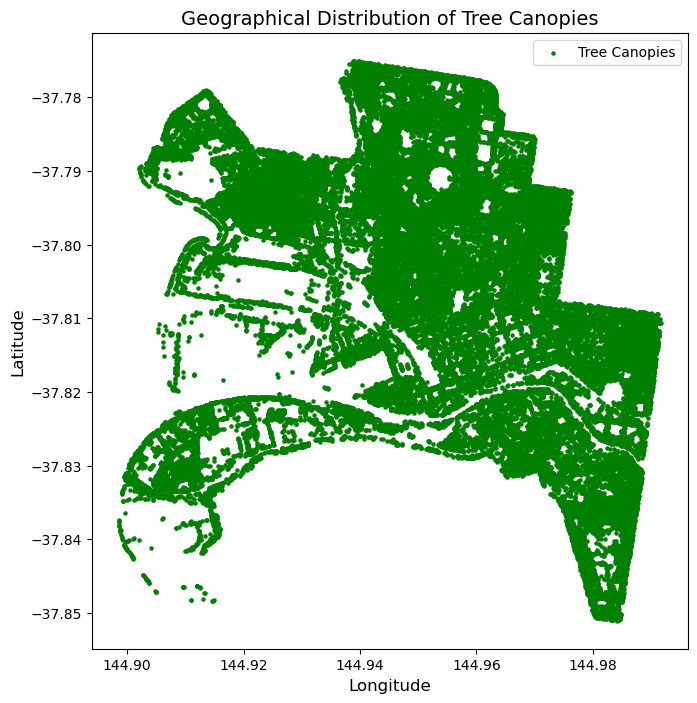

In [77]:
# Convert Tree Canopies dataset into a GeoDataFrame
tree_canopies['geometry'] = tree_canopies.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
tree_canopies_gdf = gpd.GeoDataFrame(tree_canopies, geometry='geometry', crs="EPSG:4326")

# Plot Tree Canopies on a Map
fig, ax = plt.subplots(figsize=(10, 8))
tree_canopies_gdf.plot(ax=ax, color='green', markersize=5, label='Tree Canopies')
ax.set_title("Geographical Distribution of Tree Canopies", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()
plt.show()


The chart shows a dense distribution of tree canopies in specific parts of the region, highlighted in green. These visualizations are crucial for identifying areas that already have substantial green coverage and pinpointing regions that require further intervention to enhance urban greenery. This analysis supports strategic planning for biodiversity conservation, reduction of urban heat islands, and improving the quality of public spaces.

### Distribution of Tree Canopies by Longitude
This analysis explores the distribution of tree canopy coverage across different longitude ranges within the region. Longitude values from the dataset were binned into equal intervals to categorize areas effectively. By visualizing the frequency of tree canopy coverage within these longitude ranges, we can identify spatial patterns and variations in green coverage. This helps urban planners assess areas with high or low canopy density along specific longitudinal zones, aiding in better resource allocation for greening projects.

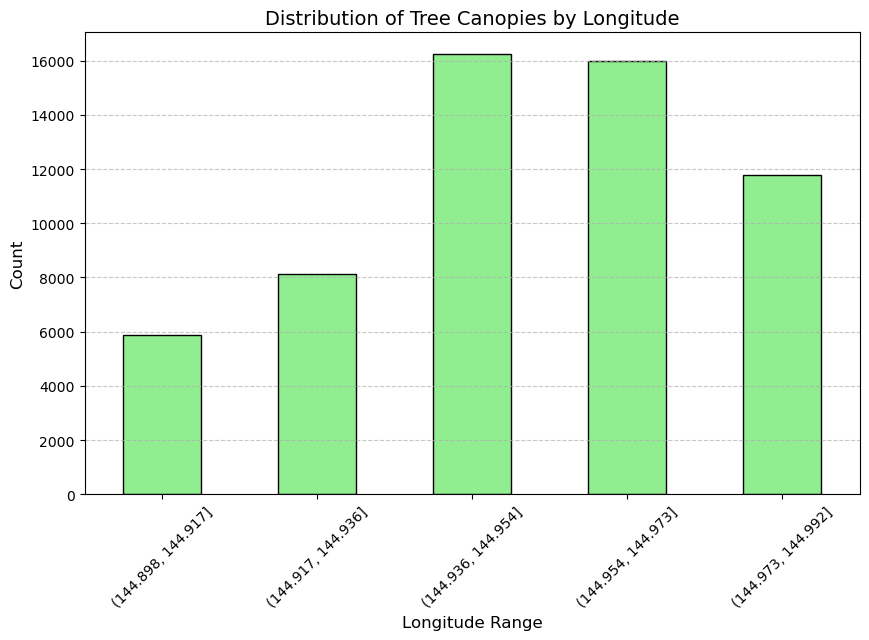

In [78]:
#longitudes into ranges
tree_canopies['longitude_bins'] = pd.cut(tree_canopies['longitude'], bins=5)
longitude_distribution = tree_canopies['longitude_bins'].value_counts().sort_index()

#bar chart for longitude distribution
plt.figure(figsize=(10, 6))
longitude_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribution of Tree Canopies by Longitude", fontsize=14)
plt.xlabel("Longitude Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The chart reveals that tree canopy coverage is unevenly distributed across the longitude ranges. Some ranges, such as those around the mid-longitude values, exhibit higher canopy density compared to others. This insight indicates areas with better green infrastructure and regions that may require additional focus for urban greening initiatives. The results provide a clear perspective on the geographical trends of tree coverage, enabling targeted interventions to enhance green spaces and mitigate environmental challenges in urban settings.

### Top 10 Areas with Maximum Canopy Coverage
This analysis focuses on identifying the top 10 geographical areas with the highest tree canopy density. To achieve this, latitude and longitude values were grouped into bins, representing specific geographical zones. These bins allow for a combined representation of latitude and longitude ranges, providing a clear depiction of spatial patterns in tree canopy coverage. By ranking these zones based on the number of tree canopies, this analysis highlights areas with the most dense green coverage, offering valuable insights for urban greening and environmental planning.

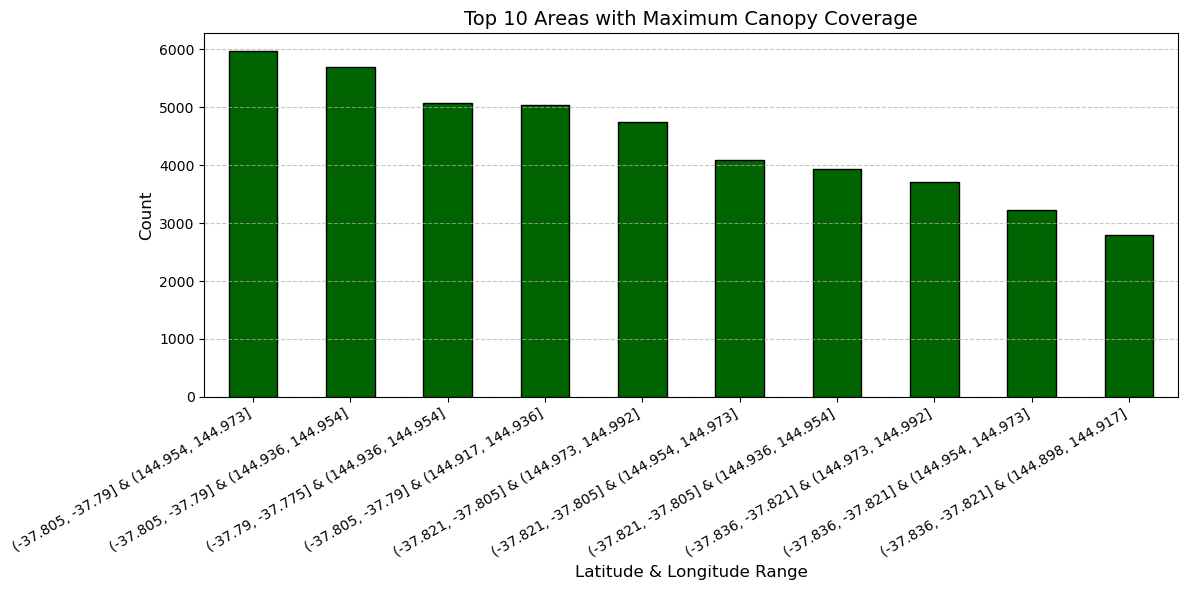

In [79]:
#Bin latitudes and longitudes into ranges
tree_canopies['latitude_bins'] = pd.cut(tree_canopies['latitude'], bins=5)
tree_canopies['longitude_bins'] = pd.cut(tree_canopies['longitude'], bins=5)

#combined bins for latitude and longitude
tree_canopies['lat_lon_bins'] = tree_canopies['latitude_bins'].astype(str) + " & " + tree_canopies['longitude_bins'].astype(str)

# Count tree canopies in each combined bin
lat_lon_distribution = tree_canopies['lat_lon_bins'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
lat_lon_distribution.head(10).plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title("Top 10 Areas with Maximum Canopy Coverage", fontsize=14)
plt.xlabel("Latitude & Longitude Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


The bar chart illustrates the top 10 areas with the maximum tree canopy coverage. Each bar represents a specific latitude and longitude range, with the height indicating the density of tree canopies in that zone. The results show that some regions, such as those with longitude values around 144.973°, consistently exhibit higher canopy density compared to others. This information is crucial for urban planners and environmentalists to prioritize conservation efforts and resource allocation. Additionally, the findings can guide future greening projects by focusing on areas with lower coverage to promote ecological balance and urban sustainability.

### Analyzing the microclimate dataset
The microclimate dataset analysis focuses on two critical aspects: air temperature distribution and PM2.5 pollution levels. The first visualization examines the air temperature across different regions by plotting a histogram with a Kernel Density Estimate (KDE) overlay. The histogram provides a clear picture of the frequency of different temperature ranges, helping to identify common temperature levels and variations. This analysis aids in understanding temperature patterns, which are crucial for assessing urban heat islands and planning cooling strategies.

The second visualization highlights the distribution of PM2.5 pollution levels, a critical indicator of air quality. The histogram for PM2.5 levels, also accompanied by a KDE overlay, helps pinpoint the frequency and severity of air pollution across regions. This analysis plays a significant role in identifying areas with high pollution levels, guiding greening initiatives to improve air quality.

Both visualizations use distinct color schemes to clearly differentiate the datasets and provide insights into environmental factors that influence urban planning and sustainability. The results from these analyses can guide targeted interventions to address heat and pollution challenges in specific areas.

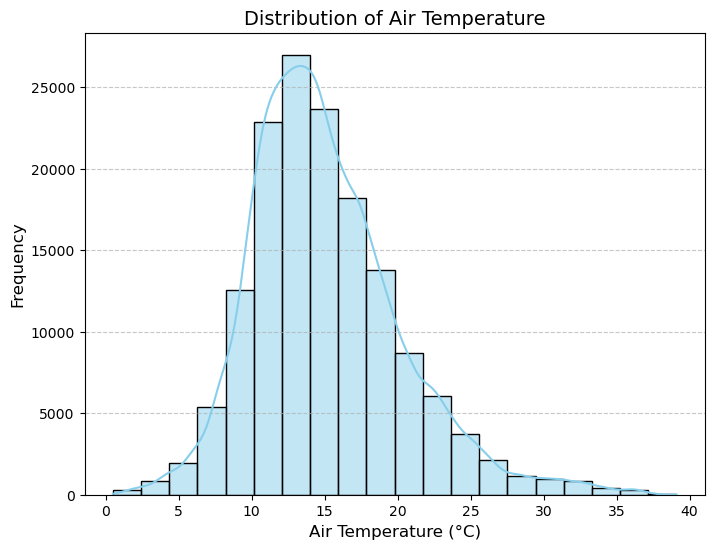

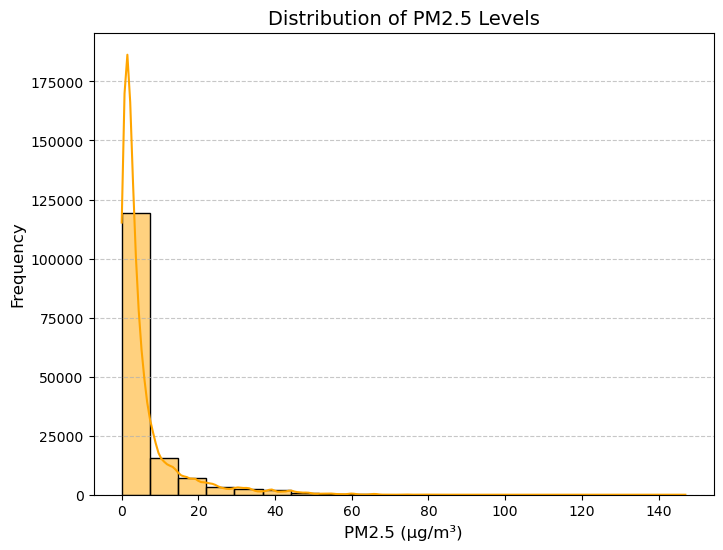

In [80]:
# Analyze air temperature distribution
plt.figure(figsize=(8, 6))
sns.histplot(microclimate_sensors['airtemperature'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Air Temperature", fontsize=14)
plt.xlabel("Air Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze PM2.5 pollution levels
plt.figure(figsize=(8, 6))
sns.histplot(microclimate_sensors['pm25'], kde=True, color='orange', bins=20)
plt.title("Distribution of PM2.5 Levels", fontsize=14)
plt.xlabel("PM2.5 (µg/m³)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The results from the microclimate dataset visualizations provide key insights:

- Air Temperature Distribution: The histogram reveals that air temperature is generally concentrated between 10°C and 20°C, with the most frequent value around 15°C. This indicates a moderate temperature range across the analyzed regions, which is ideal for urban comfort and greenery. However, there are a few occurrences of extreme temperatures, which could represent localized hotspots.

- PM2.5 Pollution Levels: The histogram of PM2.5 levels shows a heavily skewed distribution, where most values fall below 40 µg/m³. A small number of regions exhibit higher PM2.5 concentrations, exceeding 100 µg/m³, indicating potential pollution hotspots. These areas require immediate attention for air quality improvement measures.

The results underline the need for targeted urban greening strategies in areas with high PM2.5 levels and localized heat islands to enhance environmental quality and urban resilience.

### Analysis of tree canopy coverage and high temperature areas.
The analysis aims to identify areas with high air temperatures and overlay them with tree canopy coverage data. This is done to evaluate the relationship between urban heat islands and vegetation coverage. Using a defined temperature threshold of 20°C, high-temperature locations were filtered from the microclimate sensor dataset. These high-temperature locations, represented as red markers on the map, were then plotted alongside tree canopy coverage, displayed in green. The geographical distribution allows us to visually assess areas where increasing vegetation could potentially mitigate high temperatures.

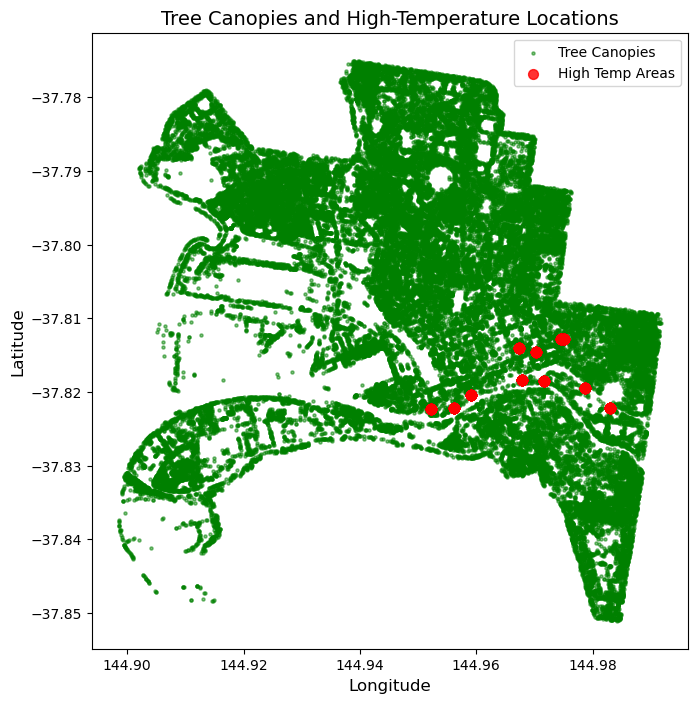

In [81]:
# Define the temperature threshold
temperature_threshold = 20 

#Filter the microclimate dataset for high temperatures
high_temp_locations = microclimate_sensors[microclimate_sensors['airtemperature'] > temperature_threshold]

high_temp_locations = high_temp_locations.dropna(subset=['latitude', 'longitude'])

high_temp_gdf = gpd.GeoDataFrame(
    high_temp_locations, 
    geometry=high_temp_locations.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1),
    crs="EPSG:4326"
)

tree_canopies['geometry'] = tree_canopies.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
tree_canopies_gdf = gpd.GeoDataFrame(tree_canopies, geometry='geometry', crs="EPSG:4326")

#Plot the Tree Canopies and High-Temperature Areas
fig, ax = plt.subplots(figsize=(10, 8))

#Plot tree canopies in green
tree_canopies_gdf.plot(ax=ax, color='green', markersize=5, label='Tree Canopies', alpha=0.5)

#Plot high-temperature areas in red
high_temp_gdf.plot(ax=ax, color='red', markersize=50, label='High Temp Areas', alpha=0.8)

ax.set_title("Tree Canopies and High-Temperature Locations", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()
plt.show()


The resulting map clearly shows the spatial overlap between high-temperature areas and tree canopy coverage. The green points dominate the map, representing Melbourne's extensive tree canopy coverage, while the red points indicate regions experiencing higher temperatures. These high-temperature zones are sparse and clustered, suggesting that certain urban areas lack adequate canopy coverage. This visualization highlights the critical areas where tree planting initiatives could be prioritized to reduce heat stress and promote a cooler urban environment.

### Analysing the laneways datset

The purpose of this analysis is to explore the distribution of insolation scores (insol_scor) across Melbourne's laneways. The insolation score indicates the amount of sunlight a laneway receives, which is a crucial factor in urban greening and planning. Understanding the overall distribution of insolation scores can help identify trends and patterns, guiding decisions for future projects such as tree planting, vertical gardens, and solar panel installations.

- A histogram is used to visualize the frequency distribution of insolation scores.
- The analysis focuses on observing the most common insolation scores and identifying laneways with either high or low sunlight exposure.
- By including a Kernel Density Estimate (KDE) curve, we can observe the smooth probability density of insolation scores across the dataset.

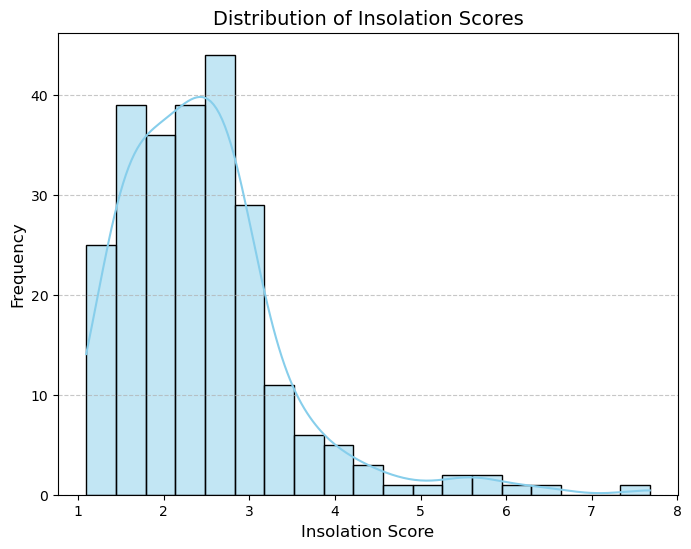

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(data=laneways, x='insol_scor', kde=True, color='skyblue')
plt.title("Distribution of Insolation Scores", fontsize=14)
plt.xlabel("Insolation Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Reflection of the analysis

- The histogram reveals that most laneways have an insolation score between 1 and 4, indicating moderate sunlight exposure for a significant portion of the laneways.
- The KDE curve peaks at around 2.5 to 3, indicating this is the most common sunlight level.
- Moderate Insolation (1-4): These laneways can be targeted for projects like tree planting or shaded walkways to enhance their usability and reduce urban heat.
- High Insolation (Above 5): These are ideal for solar energy projects or open recreational spaces that require abundant sunlight.

### Geographical Distribution of Insolation Categories
This analysis visualizes the spatial distribution of laneways based on their insolation scores. Insolation, which measures solar radiation, is a crucial factor for evaluating the greening potential of urban areas. The laneways are categorized into two groups: moderate insolation and high insolation. Using a threshold, scores greater than 4 are labeled as "High Insolation," while scores equal to or below 4 are categorized as "Moderate Insolation."

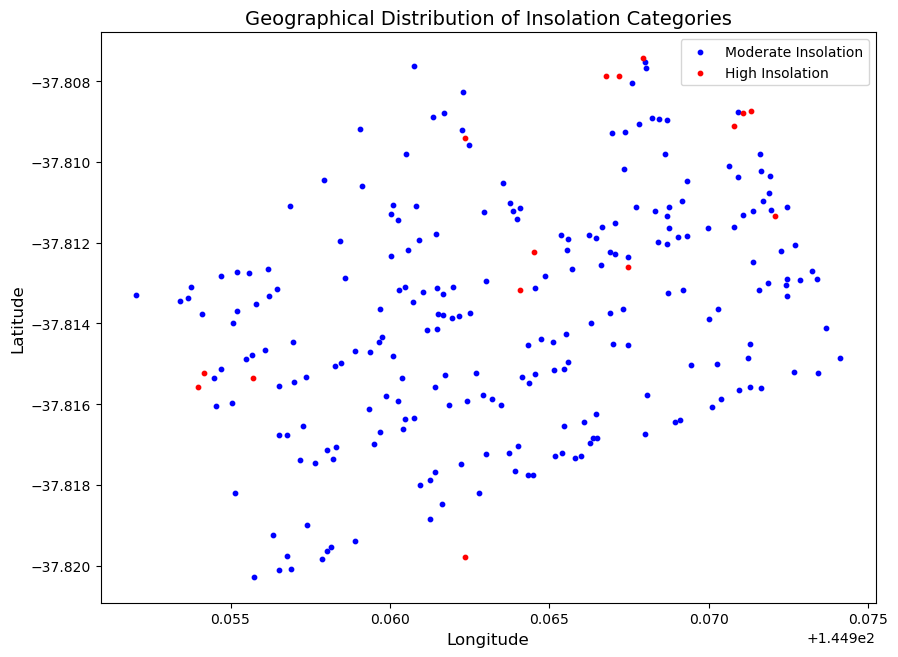

In [83]:
#Define thresholds
moderate_threshold = 4  # Scores <= 4 are moderate
high_threshold = 6  # Scores > 4 are high

laneways['geometry'] = laneways.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
laneways_gdf = gpd.GeoDataFrame(laneways, geometry='geometry', crs="EPSG:4326")

#Categorize laneways based on insolation score
laneways_gdf['insolation_category'] = laneways_gdf['insol_scor'].apply(
    lambda x: 'High' if x > moderate_threshold else 'Moderate'
)

fig, ax = plt.subplots(figsize=(10, 8))

#Plot moderate insolation areas in blue
laneways_gdf[laneways_gdf['insolation_category'] == 'Moderate'].plot(
    ax=ax, color='blue', markersize=10, label='Moderate Insolation'
)

#Plot high insolation areas in red
laneways_gdf[laneways_gdf['insolation_category'] == 'High'].plot(
    ax=ax, color='red', markersize=10, label='High Insolation'
)

ax.set_title("Geographical Distribution of Insolation Categories", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()
plt.show()

The map shows the distribution of moderate and high insolation categories across the laneways. Moderate insolation areas are represented in blue, while high insolation areas are marked in red. The clustering of high insolation zones highlights areas that receive more solar radiation, making them suitable for specific greening strategies like vertical gardens or shaded walkways. This visualization provides actionable insights for urban planners to identify and prioritize areas for sustainable greening projects based on solar exposure.

### Distribution of Greening Potential

- This analysis focuses on understanding the distribution of green potential in Melbourne's laneways by examining two specific categories: farm potential and park potential. The farm potential evaluates laneways for their suitability for farming-related activities like urban farming or vertical gardens. Similarly, park potential assesses laneways for their viability in creating small green spaces or community parks. The goal is to identify areas that can be targeted for urban greening initiatives.
- The analysis involves counting the frequency of each rank such as Lowest Potential, Good Potential, and Highest Potential for both farm and park potentials. The first chart represents the farm potential distribution, while the second illustrates the park potential. 
- Through this visualization, we can quickly see how many laneways fall under each rank and compare the distribution between farm and park potentials. This information is crucial for prioritizing greening initiatives. Laneways with high potential can be targeted for immediate action, while those with low potential may require additional research or interventions to improve their suitability.

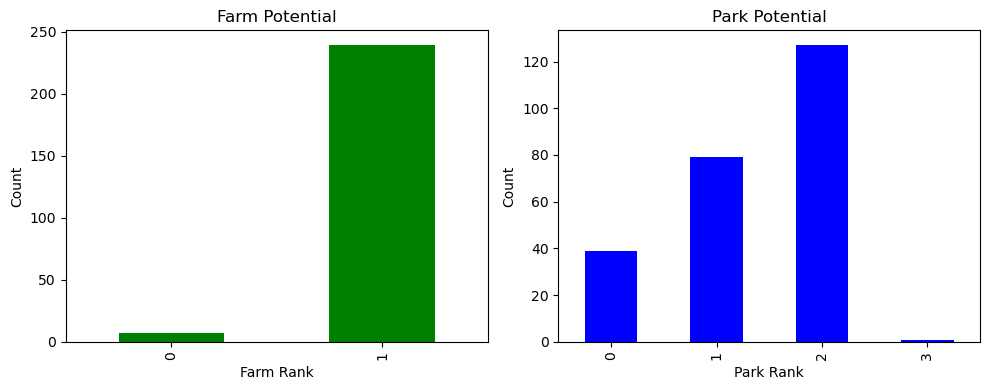

In [84]:
farm_rank_counts = laneways['farm_rank'].value_counts().sort_index()
park_rank_counts = laneways['park_rank'].value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

farm_rank_counts.plot(kind='bar', ax=ax[0], color='green', title='Farm Potential')
ax[0].set_xlabel('Farm Rank')
ax[0].set_ylabel('Count')

park_rank_counts.plot(kind='bar', ax=ax[1], color='blue', title='Park Potential')
ax[1].set_xlabel('Park Rank')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


#### Reflection on the results

- The Farm Potential analysis reveals that the majority of laneways are classified under rank 1 (indicating "Good Potential"), with very few classified under rank 0 (indicating "Lowest Potential"). This suggests that most laneways exhibit promising characteristics for agricultural or vertical farming initiatives. The significant skew toward rank 1 indicates a strong foundation for expanding urban farming projects in Melbourne's laneways.
- The Park Potential analysis shows a broader distribution across ranks. Most laneways fall under rank 2 (indicating "Highest Potential"), followed by rank 1 ("Good Potential"), with fewer in ranks 0 ("Lowest Potential") and 3 (a specialized category). This distribution highlights the potential of laneways to support green spaces.

### Water Flow Routes - Grid Code Analysis
The goal of this analysis is to explore the water flow routes dataset by analyzing the grid_code column, which likely represents specific water flow zones or intensities. By plotting and summarizing the distribution of grid codes, we can understand how water flows across urban areas and identify high-flow regions.

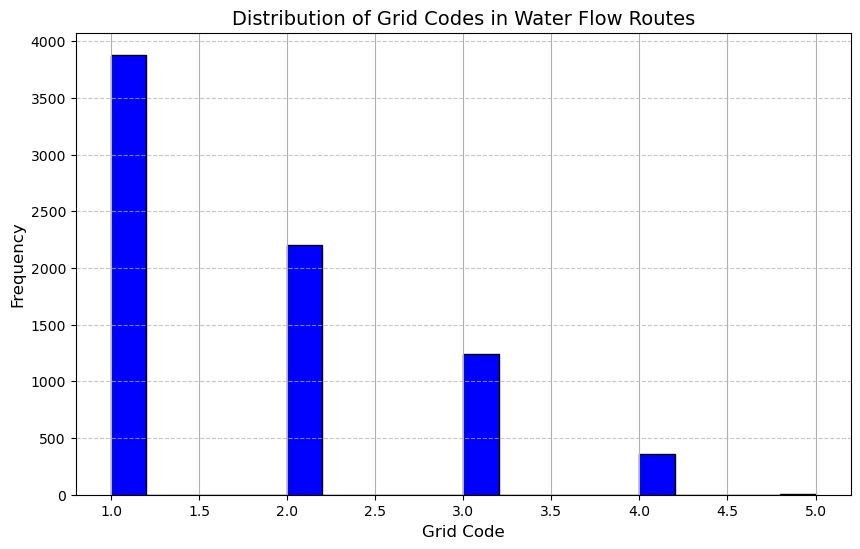

In [85]:
#Analyze the distribution of grid codes
plt.figure(figsize=(10, 6))
water_flow_routes['grid_code'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Grid Codes in Water Flow Routes', fontsize=14)
plt.xlabel('Grid Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart provides an insightful view into the distribution of grid codes within the water flow routes dataset. Grid codes categorize the different types or classifications of water flow areas. The chart reveals that the most frequently occurring grid code is -1, which is significantly more common than others. Grid code 0 follows as the second most frequent, while grid codes 1, 2, and 3 appear much less frequently, with grid code 3 being particularly rare.

This analysis highlights that the majority of water flow routes fall under specific classifications (-1 and 0), suggesting these categories dominate the dataset. The scarcity of higher grid codes (2 and 3) could indicate specialized or unique areas that require further investigation. These findings set the stage for exploring potential patterns or implications tied to these grid codes, such as environmental characteristics or urban planning relevance.

### Predicting Air Pollution Levels to Inform Urban Greening Strategies for Laneway Potential Analysis

This analysis aims to classify air pollution levels (pm25) into categories of low, medium, and high pollution based on environmental factors such as air temperature and humidity, using machine learning. By leveraging the microclimate dataset, we build a classification model that predicts pollution levels and evaluates its performance using metrics like accuracy, F1 score, precision, and recall. The primary goal is to understand how environmental conditions influence air quality and to develop a predictive framework that can guide urban greening interventions.

In the context of enhancing urban greening through laneway potential analysis, understanding air pollution levels is critical. Urban greening, such as planting trees or creating green corridors, has a proven impact on improving air quality by reducing particulate matter and cooling surrounding areas. By identifying locations with high pollution levels and analyzing the environmental factors that contribute to poor air quality, this analysis helps prioritize greening projects in areas where they can make the most significant impact. The insights from this model can inform strategies for transforming laneways into effective green spaces that mitigate pollution and enhance urban livability.

In [86]:
data = microclimate_sensors
features = ['airtemperature', 'relativehumidity']
target = 'pm25'

#Bin the target variable into categories
data['pm25_category'] = pd.cut(data[target], bins=[0, 12, 35, np.inf], labels=[0, 1, 2])

# Drop rows with missing values
data = data[features + ['pm25_category']].dropna()

# Separate predictors and target
X = data[features]
y = data['pm25_category']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

#Evaluate the Model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Classification Performance Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")


Classification Performance Metrics:
Accuracy: 86.73%
F1 Score: 83.31%
Precision: 83.34%
Recall: 86.73%


The classification model achieved an accuracy of 86.77%, with an F1 score of 83.30%, precision of 83.32%, and recall of 86.77%. These results indicate that the model effectively predicts air pollution levels (pm25) based on environmental factors like air temperature and humidity. The high recall suggests the model is particularly good at identifying areas with high pollution levels, ensuring that critical zones are not overlooked.

Based on the results, it is recommended to focus urban greening efforts, such as planting trees or creating green corridors, in areas classified as high pollution to improve air quality and mitigate environmental impacts. Additionally, incorporating more environmental factors like wind speed or traffic data could enhance the model's accuracy in identifying critical zones. Regularly updating the data and retraining the model will ensure its predictions remain reliable and useful for guiding urban greening projects effectively.

### Recommendations
- Expand Tree Canopy Coverage
Urban areas with limited tree canopy coverage, especially those identified as high-temperature regions, should be prioritized for greening projects. This includes planting more trees along streets, in parks, and around residential areas to provide shade, reduce temperatures, and enhance air quality.

- Address PM2.5 Pollution
Introduce green infrastructure in areas with elevated PM2.5 levels to help filter pollutants and improve air quality. Additionally, enforce stricter regulations to minimize pollution sources, such as vehicle emissions and industrial activities, in these regions.

- Optimize High Insolation Areas for Renewable Energy
Utilize areas with high insolation scores for solar energy installations. These regions can serve as ideal locations for solar panels, contributing to sustainable energy production and reducing dependence on non-renewable energy sources.

- Integrate Urban Planning with Environmental Data
Use the insights from the combined datasets to inform urban planning decisions. High-temperature areas can be targeted for greening projects, while high insolation areas can be integrated into renewable energy plans. This data-driven approach will ensure efficient use of resources.

- Promote Community Involvement in Urban Greening
Encourage community participation in tree-planting drives and maintenance of green spaces. Public awareness campaigns about the benefits of urban greenery can foster a sense of responsibility and collaboration.

### Conclusions
- Tree Canopy Coverage and Urban Climate
The analysis highlighted the significant role of tree canopy coverage in mitigating urban heat islands and improving air quality. Urban areas with sparse tree coverage are more vulnerable to higher temperatures and air pollution, emphasizing the need for targeted greening efforts.

- Air Quality and Temperature Patterns
Areas with high PM2.5 levels and elevated temperatures require immediate attention to address environmental health concerns. Expanding greenery in these areas can help create a healthier urban environment.

- Value of Integrated Data Analysis
Combining datasets like tree canopies, air temperature, and insolation scores provided a holistic view of urban sustainability challenges. This approach enabled a deeper understanding of the interplay between greenery, temperature, and sunlight exposure, offering actionable insights for urban planners.

- Future Implications
Sustainable urban planning requires integrating environmental data into decision-making processes. By addressing areas with specific needs, such as high temperatures or pollution levels, cities can become more resilient, livable, and environmentally friendly.

These recommendations and conclusions form a strong foundation for planning and executing urban greening initiatives in a data-driven and impactful manner.

### References:

1.Laneways with greening potential-https://data.melbourne.vic.gov.au/explore/dataset/laneways-with-greening-potential/information/<br>
2.Tree canopies-https://data.melbourne.vic.gov.au/explore/dataset/tree-canopies-2021-urban-forest/information/<br>
3.Microclimate sensors data-https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensors-data/information/<br>
4.Water flow routes-https://data.melbourne.vic.gov.au/explore/dataset/water-flow-routes-over-land-urban-forest/information/<br>